Trabalho 1

O estudo aqui proposto pode ser encontrado em https://github.com/ViniciusCMB/Metodos_Num.git


Bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt

$\dot g = 13.1*g - 13,94*g²$ 

$\dot f = 1.71 * g$ 

Sistema de equações

In [2]:
def sistema(x, t):
        f1, f2 = x
        dx1dt = 13.1*f1 - 13.94*(f1**2)
        dx2dt = 1.71*f1
        return np.array([dx1dt, dx2dt])

Função para solucionar EDO usando Runge-Kutta clássico de 4ª ordem

In [3]:
def rk4(f, x0, t):
    x = np.zeros((len(t), len(x0)))
    x[0] = x0
    for i in range(1, len(t)):  
        dt = t[i] - t[i-1]
        k1 = f(x[i-1], t[i-1])
        k2 = f(x[i-1] + 0.5*dt*k1, t[i-1] + 0.5*dt)
        k3 = f(x[i-1] + 0.5*dt*k2, t[i-1] + 0.5*dt)
        k4 = f(x[i-1] + dt*k3, t[i])
        x[i] = x[i-1] + (dt/6)*(k1 + 2*k2 + 2*k3 + k4)
    return x

Condições iniciais:

In [4]:
C_ini = 0.03 
F_ini = 0 

x0 = [C_ini, F_ini] # vetor de condições iniciais
ts = 1 # tempo de simulação em segundos
t = np.linspace(0, ts, 1001) # vetor de tempo de 0 a 10 segundos com 1001 pontos, ou seja, com um passo de 0.01 segundos

Obtem a solução:

In [5]:
solucao = rk4(sistema, x0, t)

solucao

array([[3.00000000e-02, 0.00000000e+00],
       [3.03827958e-02, 5.16266217e-05],
       [3.07703107e-02, 1.03911851e-04],
       ...,
       [9.39681923e-01, 1.18123168e+00],
       [9.39682702e-01, 1.18283854e+00],
       [9.39683470e-01, 1.18444540e+00]], shape=(1001, 2))

Plota o resultado:

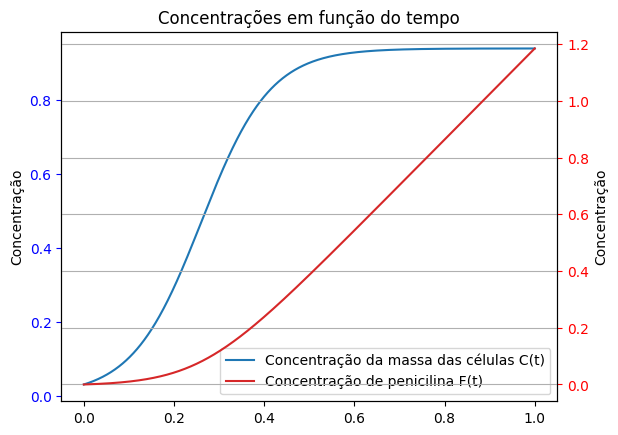

In [6]:
fig, ax = plt.subplots()
ax2 = ax.twinx() 

plotC = ax.plot(t, solucao[:, 0],label='Concentração da massa das células C(t)', color='tab:blue') # plota o gráfico da concentração
plotF = ax2.plot(t, solucao[:, 1], label='Concentração de penicilina F(t)', color='tab:red') # plota o gráfico da temperatura

ax.set_ylabel('Concentração')
ax.tick_params(axis='y', colors='blue')
ax2.set_ylabel('Concentração')
ax2.tick_params(axis='y', colors='red')
plt.xlabel('Tempo [s]')
titulo = 'Concentrações em função do tempo'
plt.title(titulo)
plt.grid()
ax.legend(handles=[plotC[0], plotF[0]])
plt.show()

Validando o resultado:

Pacotes conhecidos do python como o sympy.solve_ivp utilizando o Método Runge-Kutta explícito de ordem 5

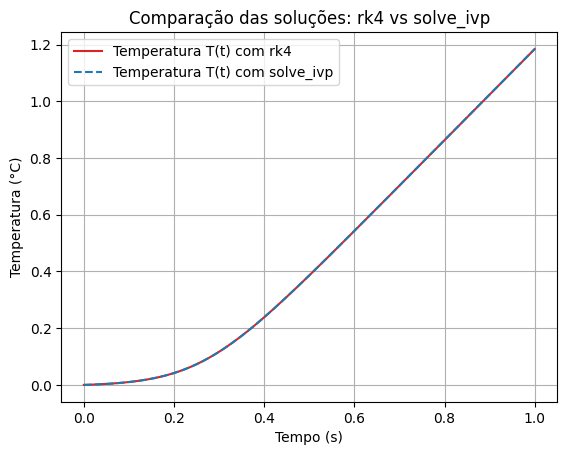

In [7]:
from scipy.integrate import solve_ivp

def sistema_ivp(t, x):
    f1, f2 = x
    dx1dt = 13.1*f1 - 13.94*(f1**2)
    dx2dt = 1.71*f1
    return [dx1dt, dx2dt]

sol_ivp = solve_ivp(sistema_ivp, [0, 1], x0, t_eval=np.linspace(0, 1, 101))

plt.plot(t, solucao[:, 1], label='Temperatura T(t) com rk4', color='tab:red')
plt.plot(sol_ivp.t, sol_ivp.y[1], '--', label='Temperatura T(t) com solve_ivp', color='tab:blue')
plt.xlabel('Tempo (s)')
plt.ylabel('Temperatura (°C)')
titulo = 'Comparação das soluções: rk4 vs solve_ivp'
plt.title(titulo)
plt.grid()
plt.legend()
plt.show()

Comparando os passos de tempo para solução:

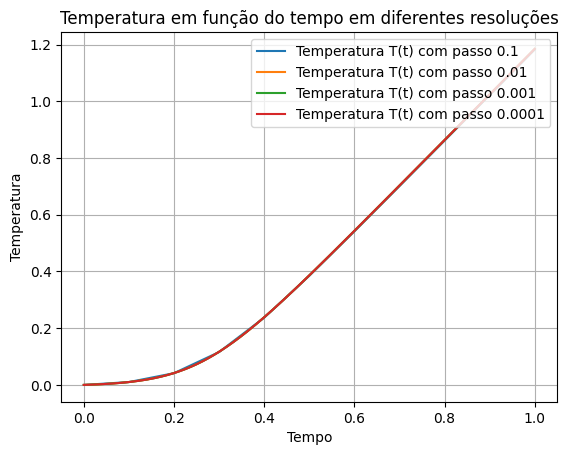

In [8]:
C_ini = 0.03
F_ini = 0

x0 = [C_ini, F_ini]

t = [np.linspace(0, 1, 11), np.linspace(0, 1, 101), np.linspace(0, 1, 1001), np.linspace(0, 1, 10001)]

solucao = [rk4(sistema, x0, tempo) for tempo in t]

for tempo, sol in zip(t, solucao):
    plt.plot(tempo, sol[:, 1], label=f'Temperatura T(t) com passo {tempo[-1]/(len(tempo)-1)}')

titulo = 'Temperatura em função do tempo em diferentes resoluções'
plt.title(titulo)
plt.xlabel('Tempo')
plt.ylabel('Temperatura')
plt.legend(loc='upper right')
plt.grid()
plt.show()


O mesmo para a concentração:

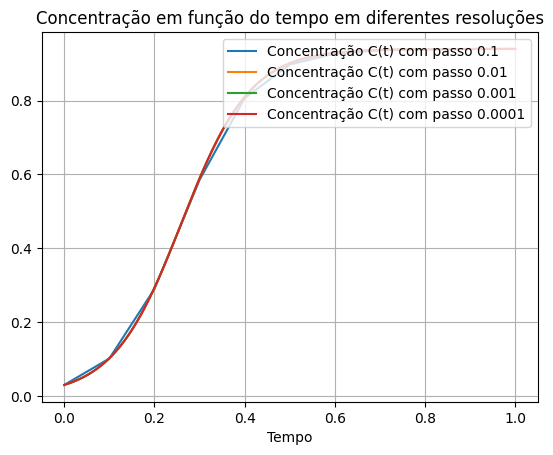

In [9]:
C_ini = 0.03
F_ini = 0

x0 = [C_ini, F_ini]
t = [np.linspace(0, 1, 11), np.linspace(0, 1, 101), np.linspace(0, 1, 1001), np.linspace(0, 1, 10001)]

solucao = [rk4(sistema, x0, tempo) for tempo in t]

for tempo, sol in zip(t, solucao):
    plt.plot(tempo, sol[:, 0], label=f'Concentração C(t) com passo {tempo[-1]/(len(tempo)-1)}')

titulo = 'Concentração em função do tempo em diferentes resoluções'
plt.title(titulo)
plt.xlabel('Tempo')
plt.legend(loc='upper right')
plt.grid()
plt.show()

Plotando diferentes condições iniciais

Comparando variações nas condições iniciais de temperatura:

Máximo T=0.9397 em t=1.00
Máximo T=0.9397 em t=1.00
Máximo T=0.9397 em t=1.00
Máximo T=0.9397 em t=1.00
Média dos últimos valores: 0.9397
Média dos máximos valores: 0.9397, desvio padrão: 0.00


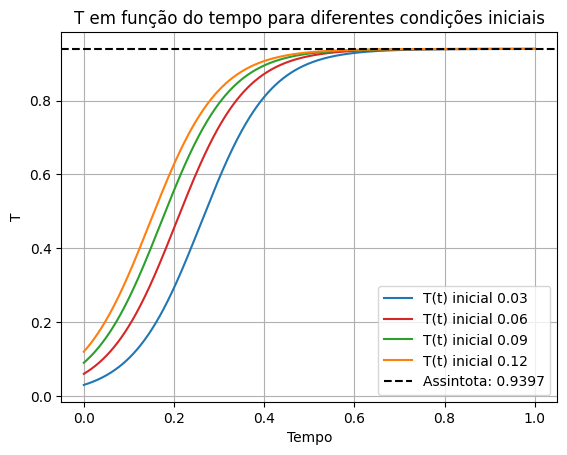

In [10]:
C_ini = np.linspace(0.03, 0.12, 4)
F_ini = 0

x0 = [C_ini, F_ini]
t = np.linspace(0, 1, 1001)

solucao = np.array([rk4(sistema, [C, F_ini], t) for C in C_ini])

fig, ax = plt.subplots()

plotT = []
cor = ['tab:blue', 'tab:red', 'tab:green', 'tab:orange', 'tab:purple', 'tab:brown']

for i, T in enumerate(C_ini):
    plotT.append(ax.plot(t, solucao[i][:, 0], label=f'T(t) inicial {T:.2f}', color=cor[i % len(cor)]))

ax.set_ylabel('T')
plt.xlabel('Tempo')
titulo = 'T em função do tempo para diferentes condições iniciais'
plt.title(titulo)
plt.grid()

media_finais = round(np.mean(solucao[:, -1, 0]), 4)
ax.axhline(media_finais, color='black', linestyle='--', label=f'Assintota: {media_finais:.4f}')

valores_maximos = np.max(solucao[:, :, 0], axis=1)
tempos_maximos = t[np.argmax(solucao[:, :, 0], axis=1)]
desvio_padrao = np.std(valores_maximos)

for i, T in enumerate(C_ini):
    print(f'Máximo T={valores_maximos[i]:.4f} em t={tempos_maximos[i]:.2f}')

print(f'Média dos últimos valores: {media_finais:.4f}')
print(f'Média dos máximos valores: {np.mean(valores_maximos):.4f}, desvio padrão: {desvio_padrao:.2f}')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

plt.show()